# UFO Sightings

Let's talk about tactics for dealing with messy data


* empty data (nans), replace junk values
* strings vs dates/ints (actual data types)
* unnecessary data - tail end rows, extra rows before header, extra columns
* redundant data
* character encoding issues
* corrupted data
* different/nonstandard separator values
* data without a header
* convert dates and index off of them
* split columns up further
* reshape data using stacking or unstacking
* Fixing weird characters/HTML entities

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!head ufo_awesome.tsv

19951009	19951009	 Iowa City, IA			Man repts. witnessing &quot;flash, followed by a classic UFO, w/ a tailfin at back.&quot; Red color on top half of tailfin. Became triangular.
19951010	19951011	 Milwaukee, WI		2 min.	Man  on Hwy 43 SW of Milwaukee sees large, bright blue light streak by his car, descend, turn, cross road ahead, strobe. Bizarre!
19950101	19950103	 Shelton, WA			Telephoned Report:CA woman visiting daughter witness discs and triangular ships over Squaxin Island in Puget Sound. Dramatic.  Written report, with illustrations, submitted to NUFORC.
19950510	19950510	 Columbia, MO		2 min.	Man repts. son&apos;s bizarre sighting of small humanoid creature in back yard.  Reptd. in Acteon Journal, St. Louis UFO newsletter.
19950611	19950614	 Seattle, WA			Anonymous caller repts. sighting 4 ufo&apos;s in NNE sky, 45 deg. above horizon.  (No other facts reptd.  No return tel. #.)
19951025	19951024	 Brunswick County, ND		30 min.	Sheriff&apos;s office calls to rept. that deputy, 20 m

We need to figure out what the columns map to. Usually we can find this from our data source - in this case there's no README, so we need to find things out

date_occurred, date_reported, location, short_description, duration, description

In [21]:
column_names = ['date_occurred', 'date_reported',
                'location', 'short_description', 
                'duration', 'description']

ufo = pd.read_csv('ufo_awesome.tsv', sep='\t', names=column_names, dtype='str')


ufo.head()

,date_occurred,date_reported,location,short_description,duration,description
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [6]:
ufo.tail()

,date_occurred,date_reported,location,short_description,duration,description
61388,20090424,20100820,"Hartwell, GA",oval,10 min,never seen anything like it.i was drivivg home...
61389,20100821,20100826,"Franklin Square, NY",fireball,20 minutes,multiple fireballs in sky over long islandat 1...
61390,20100827,20100827,"Brighton, CO",circle,at lest 45 min,"Very bright flashing in a pattern of red, whit..."
61391,20100818,20100821,"Dryden (Canada), ON",other,5 Min. maybe more,"Long steal pipe shaped object with No Wings, a..."
61392,20050502,20100824,"Fort Knox, KY",triangle,15 seconds,Flash of light made me look up to see a dark c...


In [22]:
sorted(ufo.date_occurred.unique())

['0000',
 '14000630',
 '17621211',
 '17900630',
 '18600802',
 '18640516',
 '18650630',
 '18710630',
 '18801212',
 '18960602',
 '18970415',
 '18990630',
 '19011202',
 '19050627',
 '19061111',
 '19100101',
 '19100528',
 '19100601',
 '19140915',
 '19160405',
 '19200611',
 '19200615',
 '19221222',
 '19251228',
 '19290705',
 '19300601',
 '19300630',
 '19310215',
 '19310601',
 '19330418',
 '19340915',
 '19350615',
 '19360715',
 '19360915',
 '19361015',
 '19370615',
 '19370815',
 '19390707',
 '19390715',
 '19410601',
 '19410615',
 '19410702',
 '19420215',
 '19420225',
 '19420601',
 '19420715',
 '19421107',
 '19430118',
 '19430430',
 '19430601',
 '19430608',
 '19430813',
 '19430815',
 '19430907',
 '19440101',
 '19440402',
 '19440415',
 '19440601',
 '19440606',
 '19440701',
 '19440715',
 '19440815',
 '19440909',
 '19450101',
 '19450401',
 '19450504',
 '19450601',
 '19450606',
 '19450607',
 '19450615',
 '19450710',
 '19450715',
 '19450808',
 '19450816',
 '19451215',
 '19460108',
 '19460201',
 '1

In [20]:
ufo[ufo.date_occurred == 14000630].description

40901    what I have is a picture of stone age art pain...
Name: description, dtype: object

We want to convert the 0000 values into NaNs

In [50]:
ufo.loc[ufo['date_occurred'] == '0000', 'date_occurred'] = np.nan
ufo[ufo.date_occurred.isnull()]

,date_occurred,date_reported,location,short_description,duration,description
948,NaN,19951218,"Chattanooga, TN",NaN,NaN,He called seeking information regarding the UF...
1351,NaN,19970410,"Near Randle, WA",light,45 Seconds,Summary : Large bright object moving horizonta...
1391,NaN,19970810,"Escondido (Suburbs of Eden Valley), CA",unknown,5-7 min,Summary : Approx 2200 an auto sized bright blu...
1397,NaN,19971019,"Warren, OH",unknown,3 minutes,Summary : About 100 feet from the ground. Hove...
1501,NaN,19971005,"Rohnert Park, CA",rectangle,1 minute,Summary : Saw black monolith type objectI was ...
1579,NaN,19970722,"Hampshire, TN",cigar,10-15 min,Summary : My husband and a a handful of men wh...
1640,NaN,19970720,"Marion, OH",light,about 1/2 hr - 1 hr,Summary : My 13 year old &amp; I were out look...
1707,NaN,19971004,"Spartanburg, SC",light,15 min,Summary : bright orange round object first tho...
1737,NaN,19971202,"Morrice, MI",cigar,3-5 minutes,Summary : Large and small identical craft hove...
1791,NaN,19971106,"Brentwood (Long Island), NY",NaN,unknown,Summary : My neighbor said I disapeared of the...


We should convert our datetime fields to actual datetimes so we can do nicer indexing, resampling, etc.


In [51]:
pd.to_datetime(ufo.date_occurred, format='%Y%m%d')

ValueError: time data '19940000' does not match format '%Y%m%d' (match)

We've still got junk data in here. There was no 0 month or 0 date in 1994. We could try using the date_reported column...

In [52]:
pd.to_datetime(ufo.date_reported, format='%Y%m%d')

0       1995-10-09
1       1995-10-11
2       1995-01-03
3       1995-05-10
4       1995-06-14
5       1995-10-24
6       1995-04-19
7       1995-09-11
8       1995-02-14
9       1995-09-15
10      1995-02-20
11      1995-07-24
12      1995-06-12
13      1995-08-23
14      1995-04-16
15      1995-02-07
16      1995-11-17
17      1995-06-11
18      1995-05-14
19      1995-02-04
20      1995-09-11
21      1995-11-06
22      1995-06-28
23      1995-03-14
24      1995-03-07
25      1995-05-16
26      1995-07-30
27      1995-08-22
28      1995-02-07
29      1995-09-10
           ...    
61363   2010-08-13
61364   2010-08-21
61365   2010-08-26
61366   2010-08-10
61367   2010-08-27
61368   2010-08-07
61369   2010-08-19
61370   2010-08-12
61371   2010-08-21
61372   2010-08-10
61373   2010-08-29
61374   2010-08-19
61375   2010-08-13
61376   2010-08-27
61377   2010-08-08
61378   2010-08-12
61379   2010-08-10
61380   2010-08-14
61381   2010-08-12
61382   2010-08-17
61383   2010-08-10
61384   2010

In [53]:
ufo.index = pd.to_datetime(ufo.date_reported, format='%Y%m%d')
ufo.head()

,date_occurred,date_reported,location,short_description,duration,description
date_reported,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [56]:
ufo.pop('date_reported')


KeyError: 'date_reported'

In [57]:
ufo.head()

,date_occurred,location,short_description,duration,description
date_reported,,,,,
1995-10-09,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1995-10-11,19951010,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
1995-01-03,19950101,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
1995-05-10,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
1995-06-14,19950611,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [59]:
# pull out the time-related fields

ufo = ufo[['date_occurred', 'location', 'duration']]

In [60]:
ufo.head()

,date_occurred,location,duration
date_reported,,,
1995-10-09,19951009,"Iowa City, IA",NaN
1995-10-11,19951010,"Milwaukee, WI",2 min.
1995-01-03,19950101,"Shelton, WA",NaN
1995-05-10,19950510,"Columbia, MO",2 min.
1995-06-14,19950611,"Seattle, WA",NaN


![regex](http://imgs.xkcd.com/comics/regular_expressions.png)

# Regular Expressions

In [61]:
import re

Regular expressions are s super powerful way to perform pattern-based matching on text.

Importing it is the easy part.

The patterns that we're looking for are powerful, and therefore can become complicated.

`"\s*(.+), ([A-Z]{2})\s*$"`

* `\s` : a whitespace character
* `*` : Any Number of the previous thing, including 0 (0 or more of the previous thing)
* `()` : indicate a "subpattern" - which we will use later
* `.` : ANY CHARACTER
* `+` : One or more of the previous character
* `[]` : Indicate a match of any of the characters inside the brackets
* `A-Z` : any character between A and Z
* `{}` : match a certain number of times
* `{2}` : look for exactly TWO of the previous character match
* `$` : this should be the last thing in the string that we're analyzing

This expression matches "Any amount of characters before a comma, then a space, then two capital letters"

Something like "Des Moines, IA" or "Winston-Salem, NC"

In [81]:
location_re = re.compile(r"\s*(.+), ([A-Z]{2})\s*$")

In [63]:
print(location_re.match('Hawaii'))

None


`re.match` returns None in the event of a non-match (not False), although you can actually use the result for a conditional statement

In [64]:
if not location_re.match('Hawaii'):
    print("Hawaii is not a location")

Hawaii is not a location


In [65]:
m = location_re.match('Durham, NC')

In [66]:
print(m)

<_sre.SRE_Match object; span=(0, 10), match='Durham, NC'>


In [67]:
m.groups()

('Durham', 'NC')

In [70]:
m.groups()[1]

'NC'

In [79]:
possibilities = [
    'Chicago, IL',
    'San Diego, CA',
    'Washington, DC',
    'Washington, D.C.',
    'San Juan, PR',
    'Toronto, ONT',
    'Cleveland, OH , USA ',
    'My bologna has a first name, its OSCAR, it has a second name, its MAY, ER',
    '        MADE UP LAND, AA        '
]

for p in possibilities:
    m = location_re.match(p)
    print(m)
    if m:
        print(m.groups())

<_sre.SRE_Match object; span=(0, 11), match='Chicago, IL'>
('Chicago', 'IL')
<_sre.SRE_Match object; span=(0, 13), match='San Diego, CA'>
('San Diego', 'CA')
None
None
None
None
None
None
None


Regular expressions are particular, and can be finicky, and unforgiving

In [89]:
def extract_city_state(loc):
    location_re = re.compile(r'\s*(.+), ([A-Z]{2})\s*$')
    try:
        match = location_re.match(loc)
    except:
        match = None
    
    if match:
        city, state = match.groups()
    else:
        city, state = (None, None)
    
    return city, state
        

In [86]:
extract_city_state('Los Alamos, NMX')

(None, None)

In [100]:
locations = ufo.location.map(extract_city_state)
locations.head()

date_reported
1995-10-09    (Iowa City, IA)
1995-10-11    (Milwaukee, WI)
1995-01-03      (Shelton, WA)
1995-05-10     (Columbia, MO)
1995-06-14      (Seattle, WA)
Name: location, dtype: object

In [108]:
# Maps the locations series into two different new columns

ufo['city'] = [city for city, state in locations]
ufo['state'] = [state for city, state in locations]
ufo.head()

,date_occurred,city,state,duration
date_reported,,,,
1995-10-09,19951009,Iowa City,IA,NaN
1995-10-11,19951010,Milwaukee,WI,2 min.
1995-01-03,19950101,Shelton,WA,NaN
1995-05-10,19950510,Columbia,MO,2 min.
1995-06-14,19950611,Seattle,WA,NaN


In [109]:
# reassigns the df with new columns, and uses the new order

ufo = ufo[['date_occurred', 'city', 'state', 'duration']]

In [107]:
ufo.head()

,date_occurred,city,state,duration
date_reported,,,,
1995-10-09,19951009,Iowa City,IA,NaN
1995-10-11,19951010,Milwaukee,WI,2 min.
1995-01-03,19950101,Shelton,WA,NaN
1995-05-10,19950510,Columbia,MO,2 min.
1995-06-14,19950611,Seattle,WA,NaN


If we want to see how many UFO sightings occurred per day, we can do that

In [110]:
ufo.date_occurred.groupby(ufo.index).count()

date_reported
1905-06-23     2
1995-01-01     3
1995-01-02     1
1995-01-03     8
1995-01-04     3
1995-01-05     4
1995-01-06     1
1995-01-07     4
1995-01-08     1
1995-01-09     2
1995-01-10     1
1995-01-11     1
1995-01-12     2
1995-01-13     2
1995-01-14     1
1995-01-15     2
1995-01-16     1
1995-01-17     3
1995-01-18     3
1995-01-20     3
1995-01-21     1
1995-01-22     2
1995-01-23     4
1995-01-24     5
1995-01-25     2
1995-01-26     1
1995-01-27     2
1995-01-28     1
1995-01-29     1
1995-01-30     3
              ..
2010-08-01    21
2010-08-02    14
2010-08-03    17
2010-08-04    15
2010-08-05    18
2010-08-06    25
2010-08-07    21
2010-08-08    13
2010-08-09    20
2010-08-10    26
2010-08-11    15
2010-08-12    25
2010-08-13    20
2010-08-14    25
2010-08-15    20
2010-08-16    17
2010-08-17    19
2010-08-18     9
2010-08-19    14
2010-08-20    16
2010-08-21    22
2010-08-22    17
2010-08-23    16
2010-08-24    18
2010-08-25    15
2010-08-26    23
2010-08-27    24


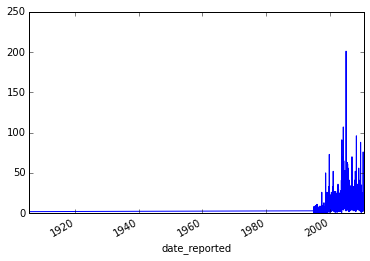

In [111]:
ufo.date_occurred.groupby(ufo.index).count().plot()

In [112]:
post1990 = ufo[ufo >= datetime.date(1990, 1, 1)]

In [113]:
post1990.head()

,date_occurred,city,state,duration
date_reported,,,,
1995-10-09,19951009,Iowa City,IA,NaN
1995-10-11,19951010,Milwaukee,WI,2 min.
1995-01-03,19950101,Shelton,WA,NaN
1995-05-10,19950510,Columbia,MO,2 min.
1995-06-14,19950611,Seattle,WA,NaN


In [114]:
post1990.date_occurred.groupby(post1990.index).count()

date_reported
1905-06-23     2
1995-01-01     3
1995-01-02     1
1995-01-03     8
1995-01-04     3
1995-01-05     4
1995-01-06     1
1995-01-07     4
1995-01-08     1
1995-01-09     2
1995-01-10     1
1995-01-11     1
1995-01-12     2
1995-01-13     2
1995-01-14     1
1995-01-15     2
1995-01-16     1
1995-01-17     3
1995-01-18     3
1995-01-20     3
1995-01-21     1
1995-01-22     2
1995-01-23     4
1995-01-24     5
1995-01-25     2
1995-01-26     1
1995-01-27     2
1995-01-28     1
1995-01-29     1
1995-01-30     3
              ..
2010-08-01    21
2010-08-02    14
2010-08-03    17
2010-08-04    15
2010-08-05    18
2010-08-06    25
2010-08-07    21
2010-08-08    13
2010-08-09    20
2010-08-10    26
2010-08-11    15
2010-08-12    25
2010-08-13    20
2010-08-14    25
2010-08-15    20
2010-08-16    17
2010-08-17    19
2010-08-18     9
2010-08-19    14
2010-08-20    16
2010-08-21    22
2010-08-22    17
2010-08-23    16
2010-08-24    18
2010-08-25    15
2010-08-26    23
2010-08-27    24


In [116]:
post1990 = post1990.drop(datetime.date(1905, 6, 23))

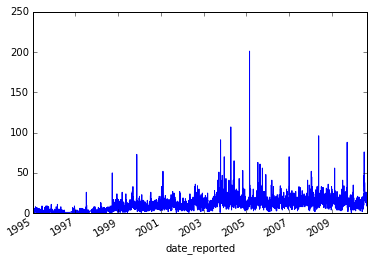

In [118]:
post1990.date_occurred.groupby(post1990.index).count().plot()

Consider resampling any time you've got a lot of dates that are spiky

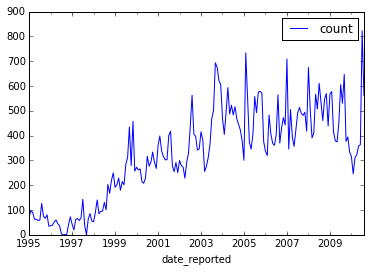

In [141]:
# post1990.date_occurred.groupby(post1990.index).count().plot()
post1990.resample("M", how=['count']).date_occurred.plot()

In [124]:
res = post1990.date_occurred.groupby(post1990.index).count()


In [126]:
res.sort(inplace=False, ascending=False)

date_reported
2005-02-24    201
2004-04-10    107
2005-02-25     98
2008-05-20     96
2003-10-18     91
2009-09-19     88
2010-07-07     76
1999-11-16     73
2003-12-20     70
2007-01-02     70
1999-11-17     69
2004-06-05     65
2005-07-16     63
2005-08-22     61
2007-01-04     59
2005-02-26     58
2005-10-02     56
2009-02-17     56
2007-01-03     54
2004-10-31     53
2008-01-15     52
2001-02-06     52
2009-09-20     51
2003-09-20     51
1998-09-24     50
2008-05-19     48
2005-11-29     48
2010-07-05     47
2003-11-16     47
2008-01-22     45
             ... 
1996-04-11      1
1998-04-16      1
1996-04-13      1
1996-04-16      1
1996-04-18      1
1996-02-29      1
1998-05-03      1
1996-02-18      1
1996-02-16      1
1995-12-30      1
1996-01-01      1
1996-01-06      1
1996-01-07      1
1996-01-08      1
1996-01-09      1
1996-01-10      1
1998-05-15      1
1996-01-12      1
1997-05-17      1
1998-05-10      1
1996-01-17      1
1996-01-27      1
1996-01-30      1
1996-02-02    

In [134]:
ufo.xs(datetime.date(2005, 2, 24))

,date_occurred,city,state,duration
date_reported,,,,
2005-02-24,19651017,La Jolla,CA,4-5 seconds
2005-02-24,20000413,Texarkana,TX,quick fly by
2005-02-24,19980820,Grande Prairie (Canada),AB,3 minutes
2005-02-24,19760516,Newtown,CT,5 minutes
2005-02-24,19670115,Forbes AFB,KS,2 o3 min.
2005-02-24,19970623,Howell,NJ,15
2005-02-24,20040501,Gardner,NY,5 min
2005-02-24,20050224,Edgewater,MD,15 seconds
2005-02-24,19840731,Rosebud,MO,5 minutes


In [ ]:
post1990.